# We Rate Dogs 

## Introduction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from PIL import Image
from io import BytesIO
import numpy as np
import requests
import tweepy
import json
from PIL import Image
from io import BytesIO

pd.set_option('float_format', '{:f}'.format)

### Gathering

In [2]:
archive = pd.read_csv('twitter_archive_enhanced.csv')
archive.shape

(2356, 17)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
print(response.status_code)

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

predict = pd.read_csv('image_predictions.tsv', sep='\t')
predict.shape

200


(2075, 12)

In [55]:
json = pd.read_json('tweet_json.txt', lines=True)

In [56]:
json['tweet_id']=json['id']

In [58]:
#Selecting columns 
twitter_api = json[['tweet_id','retweet_count', 'favorite_count']]

In [59]:
# Merging for Assesing
m1 = pd.merge(twitter_api,archive, on="tweet_id",how='left')
m2 = pd.merge(m1,predict, on="tweet_id",how='left')
df_final = m2

## Assesing 

In [60]:
pd.set_option("max_colwidth", 10)
pd.set_option('display.max_columns', 30)
df_final.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020...,416,2234,NaN,NaN,2015-1...,<a hre...,Here w...,NaN,NaN,NaN,https:...,8,10,None,None,None,None,None,https:...,1,Welsh_...,0.465074,True,collie,0.156665,True,Shetla...,0.061428,True
1,666029...,39,111,NaN,NaN,2015-1...,<a hre...,This i...,NaN,NaN,NaN,https:...,7,10,a,None,None,None,None,https:...,1,redbone,0.506826,True,miniat...,0.074192,True,Rhodes...,0.072010,True
2,666033...,35,98,NaN,NaN,2015-1...,<a hre...,Here i...,NaN,NaN,NaN,https:...,9,10,a,None,None,None,None,https:...,1,German...,0.596461,True,malinois,0.138584,True,bloodh...,0.116197,True
3,666044...,113,244,NaN,NaN,2015-1...,<a hre...,This i...,NaN,NaN,NaN,https:...,6,10,a,None,None,None,None,https:...,1,Rhodes...,0.408143,True,redbone,0.360687,True,miniat...,0.222752,True
4,666049...,36,86,NaN,NaN,2015-1...,<a hre...,Here w...,NaN,NaN,NaN,https:...,5,10,None,None,None,None,None,https:...,1,miniat...,0.560311,True,Rottwe...,0.243682,True,Doberman,0.154629,True


In [10]:
df_final.tail()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2051,891327...,7620,34385,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,12,10,Franklin,None,None,None,None,https:...,2,basset,0.555712,True,Englis...,0.225770,True,German...,0.175219,True
2052,891689...,7103,35974,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,13,10,Darla,None,None,None,None,https:...,1,paper_...,0.170278,False,Labrad...,0.168086,True,spatula,0.040836,False
2053,891815...,3427,21435,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,12,10,Archie,None,None,None,None,https:...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2054,892177...,5193,28505,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,13,10,Tilly,None,None,None,None,https:...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2055,892420...,6893,32964,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,13,10,Phineas,None,None,None,None,https:...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2056 non-null   int64  
 1   retweet_count               2056 non-null   int64  
 2   favorite_count              2056 non-null   int64  
 3   in_reply_to_status_id       23 non-null     float64
 4   in_reply_to_user_id         23 non-null     float64
 5   timestamp                   2056 non-null   object 
 6   source                      2056 non-null   object 
 7   text                        2056 non-null   object 
 8   retweeted_status_id         70 non-null     float64
 9   retweeted_status_user_id    70 non-null     float64
 10  retweeted_status_timestamp  70 non-null     object 
 11  expanded_urls               2056 non-null   object 
 12  rating_numerator            2056 non-null   int64  
 13  rating_denominator          2056 

In [12]:
df_final.describe()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,2056.00...,2056.00...,2056.00...,23.000000,23.000000,70.000000,70.000000,2056.00...,2056.00...,2056.00...,2056.00...,2056.00...,2056.00...
mean,7377003...,2324.19...,7265.58...,6978111...,4196983...,7592547...,1124945...,12.265078,10.516051,1.204280,0.594386,0.134767,0.060402
std,6751436...,4062.06...,10992.5...,4359383...,0.000000,5695445...,9411968...,40.867720,7.210005,0.563359,0.271242,0.100744,0.051003
min,6660208...,11.000000,0.000000,6671521...,4196983...,6675093...,783214....,0.000000,2.000000,1.000000,0.044333,0.000000,0.000000
25%,6762329...,494.750000,1385.25...,6732410...,4196983...,7086319...,4196983...,10.000000,10.000000,1.000000,0.363272,0.053894,0.016234
50%,7110025...,1094.00...,3183.00...,6757073...,4196983...,7755992...,4196983...,11.000000,10.000000,1.000000,0.587797,0.118635,0.049479
75%,7928012...,2673.25...,9028.75...,7031489...,4196983...,7947981...,4196983...,12.000000,10.000000,1.000000,0.844247,0.195667,0.092157
max,8924206...,69521.0...,142035....,8558181...,4196983...,8650134...,7874617...,1776.00...,170.000000,4.000000,1.000000,0.488014,0.273419


In [13]:
df_final.describe(include=[object])

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,jpg_url,p1,p2,p3
count,2056,2056,2056,70,2056,2056,2056,2056,2056,2056,2056,2056,2056,2056
unique,2056,3,2056,70,2056,934,2,2,2,2,1997,377,402,407
top,2015-1...,<a hre...,Here w...,2015-1...,https:...,None,None,None,None,None,https:...,golden...,Labrad...,Labrad...
freq,1,2016,1,1,1,570,1978,2048,1836,2032,2,150,104,79


In [14]:
#Cheking for nulls
df_final.isnull().values.sum()

10024

In [15]:
df_final.isnull().sum()

tweet_id                         0
retweet_count                    0
favorite_count                   0
in_reply_to_status_id         2033
in_reply_to_user_id           2033
timestamp                        0
source                           0
text                             0
retweeted_status_id           1986
retweeted_status_user_id      1986
retweeted_status_timestamp    1986
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
jpg_url                          0
img_num                          0
p1                               0
p1_conf                          0
p1_dog                           0
p2                               0
p2_conf                          0
p2_dog                           0
p3                               0
p3_conf             

In [16]:
#Checking numerator rating
df_final.rating_numerator.value_counts().sort_index(ascending=True)

0         2
1         5
2         9
3        19
4        16
5        34
6        32
7        52
8        95
9       151
10      425
11      413
12      471
13      275
14       37
15        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [17]:
df_final.rating_numerator.describe()

count   2056.00...
mean     12.265078
std      40.867720
min       0.000000
25%      10.000000
50%      11.000000
75%      12.000000
max     1776.00...
Name: rating_numerator, dtype: float64

In [18]:
#Checking Denominator rating
df_final.rating_denominator.value_counts().sort_index(ascending=True)

2         1
7         1
10     2038
11        2
20        1
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [19]:
#Inspecting for duplicates
df_final.duplicated().sum()

0

In [20]:
pd.set_option("max_colwidth", 30)
#Inspecting dog breeds
df_final[['p1', 'p2', 'p3']].describe(include=['object'])

,p1,p2,p3
count,2056,2056,2056
unique,377,402,407
top,golden_retriever,Labrador_retriever,Labrador_retriever
freq,150,104,79


In [21]:
#Inspecting confidence levels
df_final[['p1_conf', 'p2_conf',
          'p3_conf']].describe().loc[['min', 'max', 'mean']].round(5)

,p1_conf,p2_conf,p3_conf
min,0.044330,0.000000,0.000000
max,1.000000,0.488010,0.273420
mean,0.594390,0.134770,0.060400


In [22]:
#Inspecting dog stages
df_final[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,1978.000000,2048.000000,1836.000000,2032.000000
doggo,78.000000,NaN,NaN,NaN
floofer,NaN,8.000000,NaN,NaN
pupper,NaN,NaN,220.000000,NaN
puppo,NaN,NaN,NaN,24.000000


In [23]:
#Inspecting Names
df_final.name.loc[50:60]

50      None
51         a
52     Carll
53    Klevin
54      None
55      Keet
56      None
57      Dave
58     Clybe
59      Gabe
60      None
Name: name, dtype: object

In [24]:
#Inspecting favorite and retweet count
df_final[['favorite_count', 'p1', 'p2', 'p3']].min()

favorite_count               0
p1                Afghan_hound
p2                Afghan_hound
p3                Afghan_hound
dtype: object

In [25]:
df_final[['retweet_count', 'p1', 'p2', 'p3']].max()

retweet_count          69521
p1                     zebra
p2               wood_rabbit
p3                     zebra
dtype: object

 ## Observations:
 Quality Issues:
 - Completeness: 10124 missing records.
 - Incorrect datatype in columns: `"tweet_id"`,`"timestamp"` 
 - The `"name"` column has accuracy issues
 - The `"in_reply_to_status_id"`, `"in_reply_to_user_id`` columns has missing values and we are not interest in replies.
 - The `"p1"`,`"p2"`,`"p3"` columns with validity and consistency issues
 - The `"p1_dog"`,`"p2_dog"`,`"p3_dog"` columns  with validity issues
 - We can observe that there are some 'None',objects present in `"doggo"`,`"floofer"`,`"pupper"` and`"puppo"` which have to be convert into 'NaN'

- The `"retweeted_status_id"`, `"retweeted_status_user_id"`,`"retweeted_status_timestamp"` are related to retweets should be dropped
 
 
 
## Tidyness
- The `"p1_conf"`,`"p2_conf"`,`"p3_conf"` are related to dog test, shoud be converted to one column
- The `"doggo"`,`"floofer"`,`"pupper"` and`"puppo"` are related to dog stage and doesnt follow rules of tidy data.

In [26]:
#Creating copies before cleaning
# Making a copies of original pieces
twitter_api_clean = twitter_api.copy()
archive_clean = archive.copy()
predict_clean = predict.copy()

## Clean

### 1. Define
Using pd.isna() on:
`'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
 'retweeted_status_user_id','retweeted_status_timestamp'`


### Code

In [27]:
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isna()]
archive_clean = archive_clean[archive_clean['in_reply_to_user_id'].isna()]
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isna()]
archive_clean = archive_clean[archive_clean['retweeted_status_user_id'].isna()]
archive_clean = archive_clean[archive_clean['retweeted_status_timestamp'].isna()]

### Test

In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### 2. Define
 Fixing Dog Stages

In [29]:
# replacing the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

archive_clean.doggo = archive_clean.doggo.apply(make_dummy)
archive_clean.floofer = archive_clean.floofer.apply(make_dummy)
archive_clean.pupper = archive_clean.pupper.apply(make_dummy)
archive_clean.puppo = archive_clean.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean['none'] = archive_clean['doggo'] + archive_clean['floofer'] + \
                        archive_clean['pupper'] + archive_clean['puppo']

In [30]:
stage_none = lambda x: 1 if x == 0 else 0

archive_clean['none'] = archive_clean['none'].apply(stage_none)

stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

conditions = [(archive_clean[stage[0]] == 1), (archive_clean[stage[1]] == 1),
              (archive_clean[stage[2]] == 1), (archive_clean[stage[3]] == 1),
              (archive_clean[stage[4]] == 1)]

archive_clean['stage'] = np.select(conditions, stage, default=stage[4])

archive_clean.drop(stage, axis=1, inplace=True)

archive_clean['stage'] = archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbcm/en/q/19c9fbc

### Test

In [31]:
archive_clean.stage.value_counts()

none       1761
pupper      221
doggo        81
puppo        24
floofer      10
Name: stage, dtype: int64

### 4. Define
 Change ['timestamp'] using pd.to_datetime

### Code

In [32]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

### Test

In [33]:
archive_clean.timestamp.dtypes

datetime64[ns, UTC]

### 5. Define
- Change tweet_id datatype in dataframe from int64 to object 

### Code

In [34]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
predict_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
twitter_api_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

### Test

In [35]:
archive_clean.tweet_id.dtype

dtype('O')

In [36]:
predict_clean.tweet_id.dtype

dtype('O')

In [37]:
twitter_api_clean.tweet_id.dtype

dtype('O')

### 6. Define
-  Creating new 'breed' and 'confidence' collumn

### Code

In [38]:
breed = []
confidence = []


def choose_breed(predict_clean):
    if predict_clean['p1_dog'] == True:
        breed.append(predict_clean['p1'])
        confidence.append(predict_clean['p1_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)


# function call
predict_clean.apply(choose_breed, axis=1)
# add the two columns
predict_clean['breed'] = breed
predict_clean['confidence'] = confidence
predict_clean.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
871,761599872357261312,https://pbs.twimg.com/medi...,1,Great_Dane,0.126924,True,Greater_Swiss_Mountain_dog,0.110037,True,German_short-haired_pointer,0.090816,True,Great_Dane,0.126924


In [39]:
#fixing breed spelling
predict_clean['breed'] = predict_clean['breed'].str.replace('_', ' ')

In [40]:
# Converting all breeds to lower case
predict_clean['breed'] = predict_clean['breed'].str.lower()

In [41]:
predict_clean.breed.str.replace('Unknown', 'np.nan')

0       welsh springer spaniel
1                      redbone
2              german shepherd
3          rhodesian ridgeback
4           miniature pinscher
                 ...          
2070                    basset
2071                   unknown
2072                 chihuahua
2073                 chihuahua
2074                   unknown
Name: breed, Length: 2075, dtype: object

### Test

In [42]:
predict_clean.breed.value_counts()

unknown               543
golden retriever      150
labrador retriever    100
pembroke               89
chihuahua              83
                     ... 
japanese spaniel        1
scotch terrier          1
standard schnauzer      1
entlebucher             1
clumber                 1
Name: breed, Length: 112, dtype: int64

### 8. Define
- Converting None to NaN



### Code 

In [43]:
archive_clean.replace(to_replace='None', value=np.nan, inplace=True)
archive_clean.replace(to_replace='Unknown', value=np.nan, inplace=True)
archive_clean.replace(to_replace='unknown', value=np.nan, inplace=True)

### Test

In [44]:
archive_clean[archive_clean == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Final View

In [45]:
df_clean = twitter_api_clean.merge(archive_clean,on='tweet_id',how="right").merge(predict_clean,on='tweet_id',how="right")

In [46]:
df_clean.sample(3)

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
1981,672970152493887488,4093.000000,18916.000000,NaN,NaN,2015-12-05 02:46:02+00:00,"<a href=""http://twitter.co...",This is Chet. He's having ...,NaN,NaN,NaN,https://twitter.com/dog_ra...,7.000000,10.000000,Chet,pupper,https://pbs.twimg.com/medi...,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,komondor,0.974781
1491,692894228850999298,2050.000000,7774.000000,NaN,NaN,2016-01-29 02:17:12+00:00,"<a href=""http://twitter.co...",Meet Tupawc. He's actually...,NaN,NaN,NaN,https://twitter.com/dog_ra...,10.000000,10.000000,Tupawc,none,https://pbs.twimg.com/medi...,1,golden_retriever,0.560699,True,otterhound,0.199482,True,clumber,0.040682,True,golden retriever,0.560699
1547,689280876073582592,2595.000000,8692.000000,NaN,NaN,2016-01-19 02:59:01+00:00,"<a href=""http://twitter.co...",This is Herald. He wants y...,NaN,NaN,NaN,https://twitter.com/dog_ra...,10.000000,10.000000,Herald,none,https://pbs.twimg.com/medi...,1,Yorkshire_terrier,0.912804,True,silky_terrier,0.067822,True,Australian_terrier,0.004451,True,yorkshire terrier,0.912804


In [47]:
#saving to csv
df_clean.to_csv('twitter_archive_master.csv',index=False)

# Visuals  

In [48]:
def labels_and_title(x, y, title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    return labels_and_title


#Pick a palette
sns.color_palette("rocket", as_cmap=True)
# Generating a graphical plot for the data
sns.set(rc={'figure.figsize': (10, 8)})

# Question 1: What is WeRateDogs's posting trend overtime?

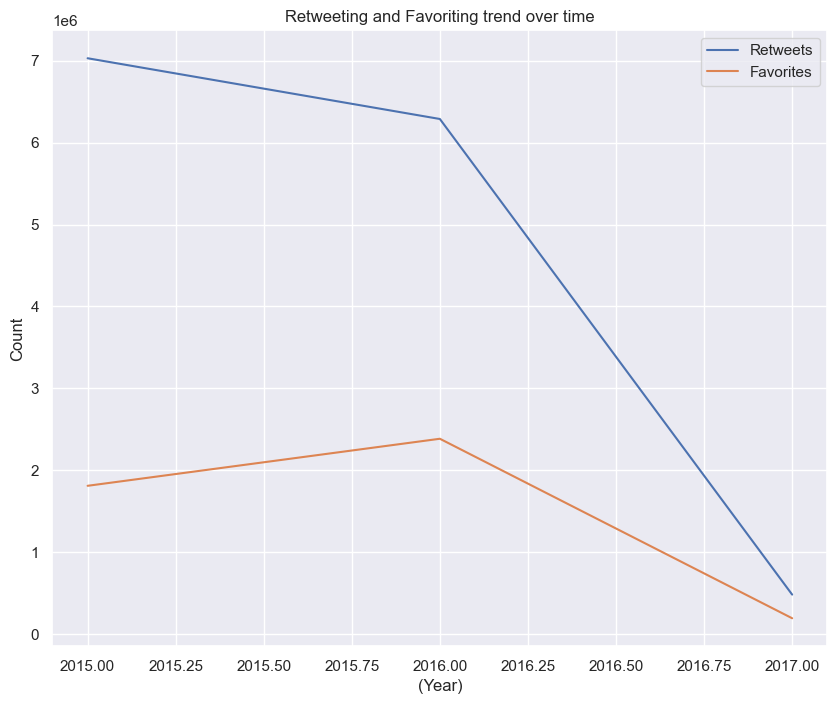

In [49]:
years = df_clean.timestamp.dt.year
ret_fav = df_clean.pivot_table(index=years, values=['favorite_count','retweet_count'], aggfunc='sum')
ret_fav
ret_fav.groupby(years).plot(kind='line')
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

###  Regarding to activity overtime, we can cleary notice a drop from 2016 to 2017 with a diference of 42,09 % in `"favorite_count"`, and  a drop from 2016 to 2017 with a diference of 49,96 % in `"retweet_count"`.


## Question 2: Which breed of dogs got the highest  favorite counts?

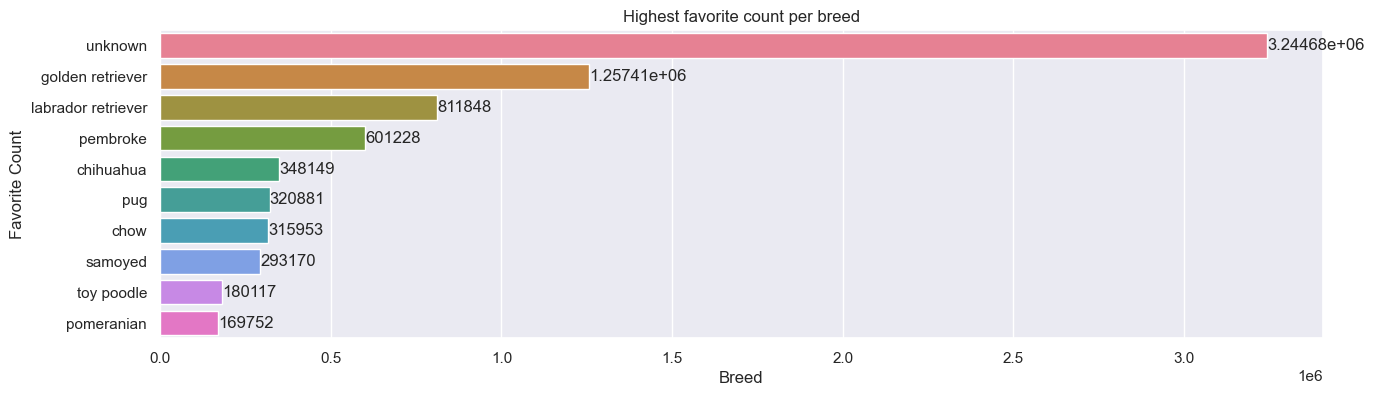

In [50]:
color = (sns.color_palette("husl", 10))
sns.set(rc={'figure.figsize': (15, 4)})
sns.set(font_scale=1)
pivot_breed= df_clean.pivot_table(index=['breed'], values=['favorite_count'], aggfunc='sum').sort_values(by="favorite_count",ascending=False)

ax = sns.barplot(x='favorite_count', y=pivot_breed.index, data=pivot_breed, palette=color,order=df_clean.breed.value_counts().iloc[:10].index, )
plt.title('Highest favorite count per breed')
plt.ylabel('Favorite Count')
plt.xlabel('Breed')
plt.savefig('breed')
for i in ax.containers:
    ax.bar_label(i,)
    pd.set_option('float_format', '{:f}'.format)

In [51]:
pivot_stage

NameError: name 'pivot_stage' is not defined

###   We can observe that "golden retriever" breed  with 1,257,407 likes, in second place we have the Labrador Retriever with 811848 likes and in the third place the "pembroke" with 601228. 

## Question 3: Which stage of dogs got the highest favorite counts?¶ 

In [ ]:
pivot_stage = df_clean.pivot_table(index=['stage'], values=['favorite_count'], aggfunc='sum')
pivot_stage
color = (sns.color_palette("husl", 4))
sns.set(rc={'figure.figsize': (10, 5)})
sns.set(font_scale=1)
#f = df_clean.sort_values(by='favorite_count', ascending=False)
ax = sns.barplot(y=pivot_stage.index,
                 x='favorite_count',
                 data=pivot_stage,
                 palette=color,
                 order=["pupper","doggo", "floofer",  "puppo"],
                 ci=None)
plt.title('Highest favorite count per stage')
plt.ylabel('')
plt.xlabel('')
plt.savefig('stages')
for i in ax.containers:
    ax.bar_label(i,)

### Cleary the most common stage is `"pupper"` with a total of 2,052,302 of favorites, representing 84,19 % of all stages, excluding "nones".

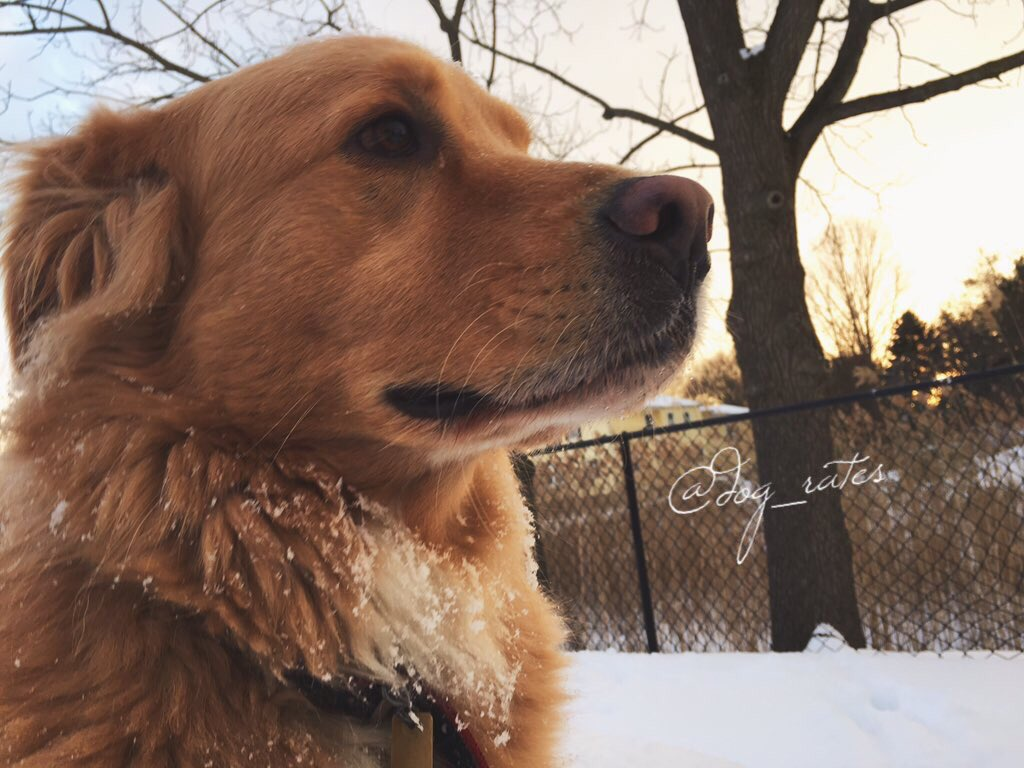

In [52]:
#Showing Top Breed image
top_breed = df_clean[df_clean["breed"]=="golden retriever"]
url = top_breed.jpg_url.iloc[50]
response = requests.get(url)
Image.open(BytesIO(response.content))